In [1]:
import pandas as pd
df = pd.read_csv("diabetes_dataset.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df
# print(df.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
x = df.drop(['Outcome'], axis=1)

In [7]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
from sklearn.tree import DecisionTreeClassifier #mengimport rumus klasifikasi menggunakan decision tree
from sklearn.model_selection import train_test_split # fungsi untuk mengsplit data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =1)

In [13]:
# membuat object decision tree
model = DecisionTreeClassifier()
# train data decision trree
model = model.fit(x_train,y_train)
# prediksi respon dari data testing
y_pred = model.predict(x_test)

In [16]:
# evaluasi skor akurasi data
from sklearn import metrics #modul untuk mencari akurasi
print("Akurasi : ", metrics.accuracy_score(y_test, y_pred)*100)

Akurasi :  67.53246753246754


In [18]:
# evaluasi menggunakan confussion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[74, 25],
       [25, 30]], dtype=int64)

In [19]:
print("Akurasi : ", ((74+30)/74+30+25+25))

Akurasi :  81.4054054054054


In [20]:
# evaluasi klasifikasi menggunakan nilai report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        99
           1       0.55      0.55      0.55        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



In [21]:
# memvisualisasikan data decsision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [22]:
features = x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [25]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = features,class_names=['0','1'])

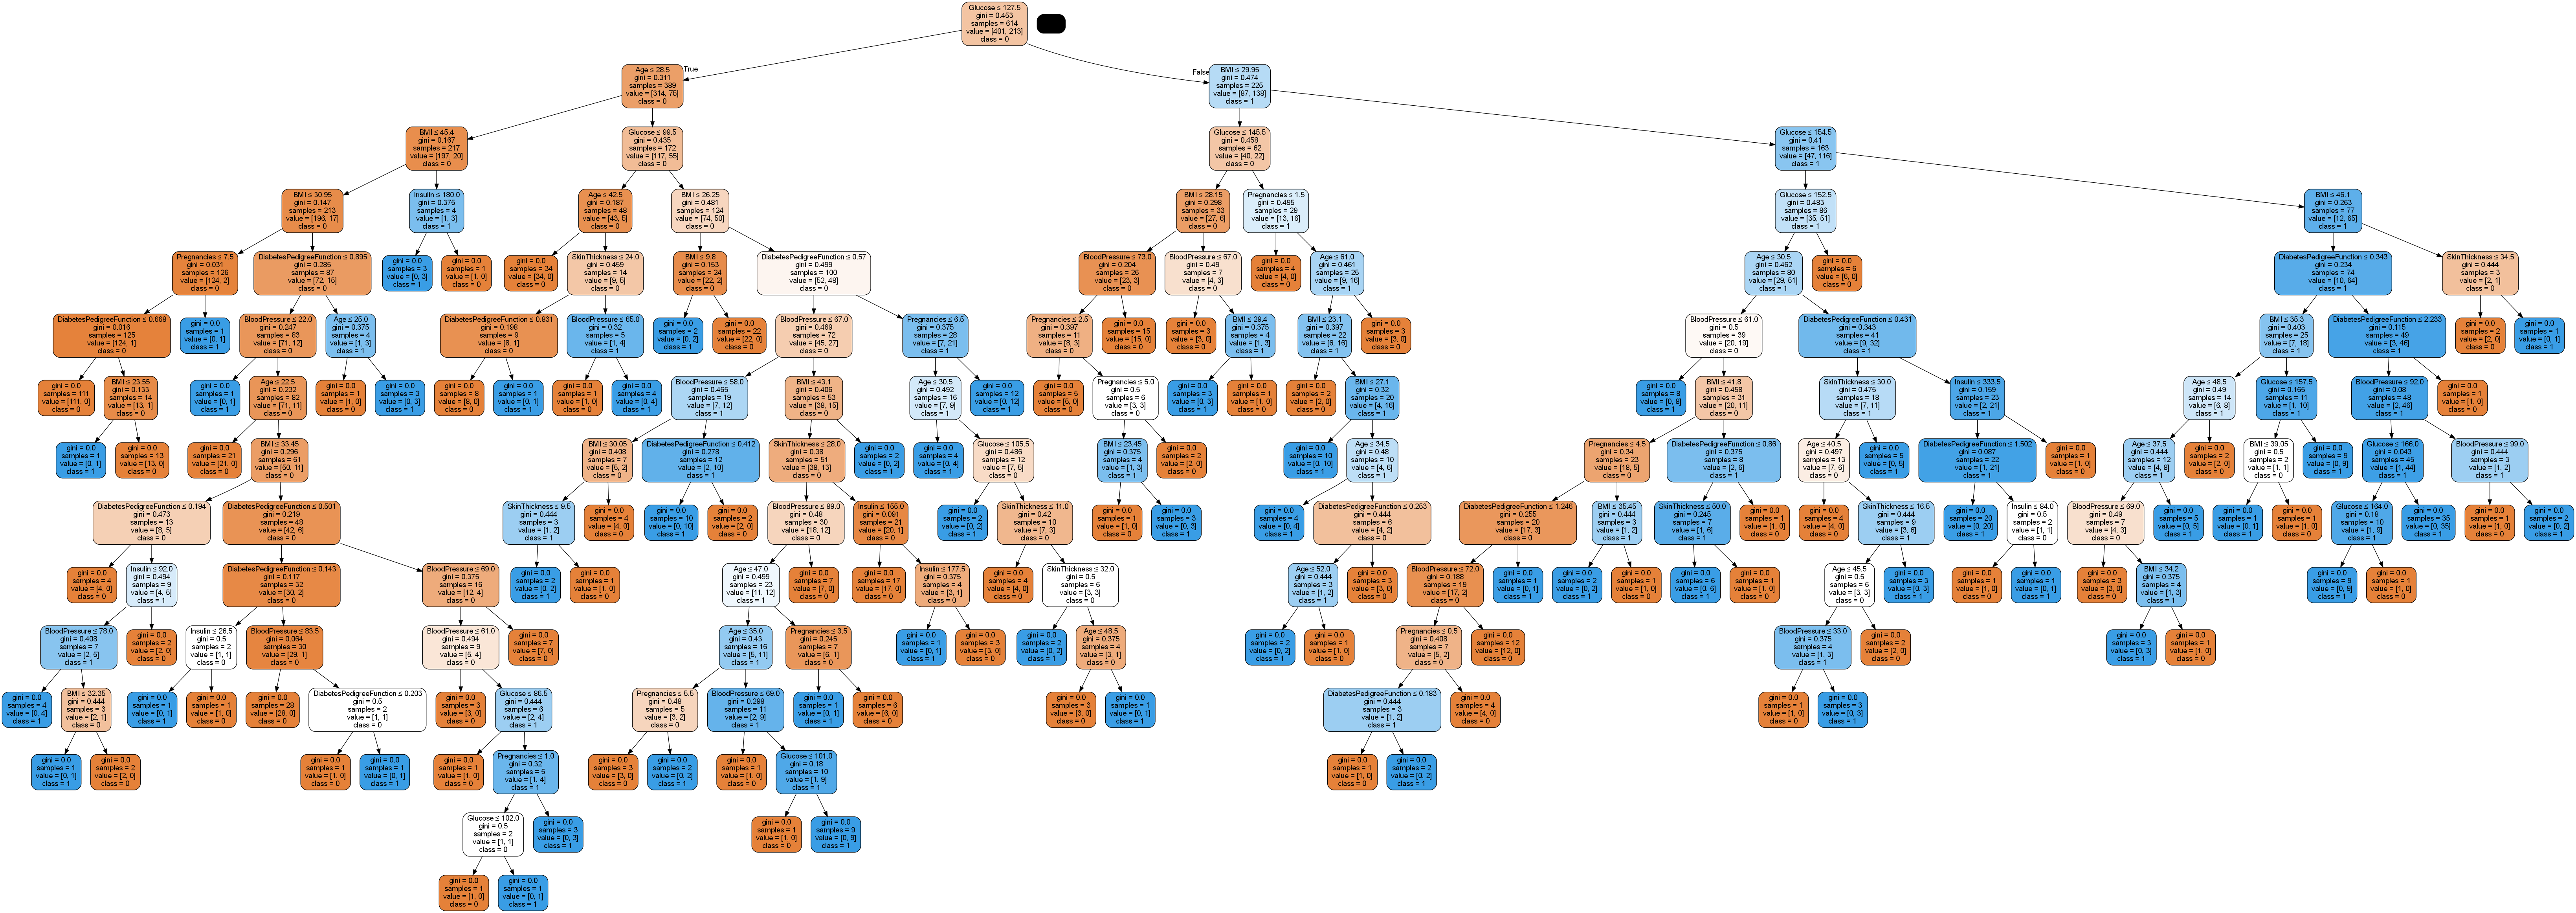

In [29]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [30]:
# membuat decision tree object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# train data decsision tree
model = model.fit(x_train,y_train)
# prediksi respon dataset
y_pred = model.predict(x_test)
# akurasi
print("Akurasi : ", metrics.accuracy_score(y_test,y_pred)*100)

Akurasi :  79.87012987012987


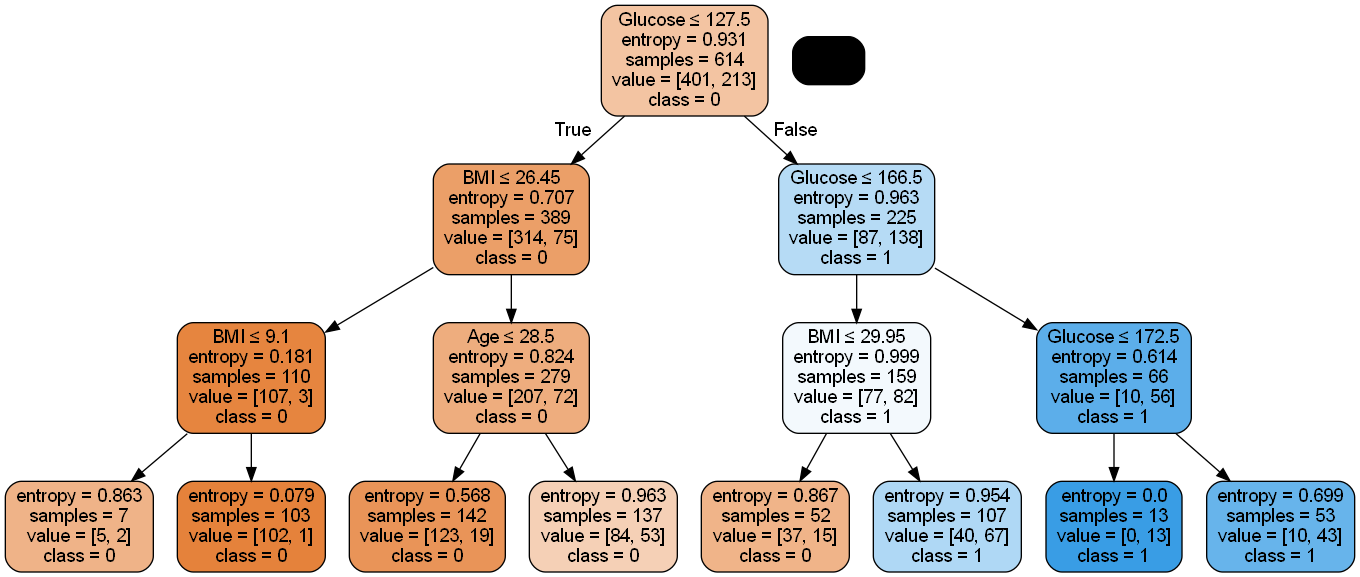

In [31]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_predicition.png')
Image(graph.create_png())